# **<font size=4 color=#BB3D00 face=微软雅黑>常见的非周期性波形</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/gs/common-aperiodic-waveforms.html   
描述：本案例由2个示例构成：   
### - <font size=3 color=DarkOrChid>示例1：生成线性、对数或二次扫频正弦信号</font>
### - <font size=3 color=DarkOrChid>示例2：使用指定时间、中心频率和小数带宽生成高斯调制正弦脉冲</font>

## **<font size=3 face=微软雅黑>※Python案例</font>** 

针对以上案例，采用Python语言实现。

### - <font size=3 color=DarkOrChid>示例1：生成线性、对数或二次扫频正弦信号</font>

计算采样率为 1 kHz，从 DC 开始，总长 2 秒并在 1 秒处瞬时频率为 150 Hz 的线性 chirp 信号。绘制 chirp 的频谱图。指定相邻窗段之间的重叠为 90%。

[]

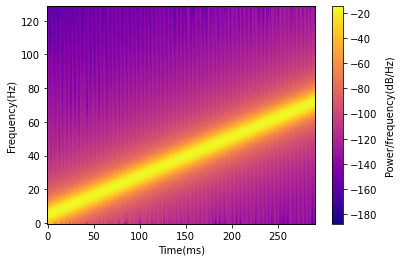

In [160]:
from scipy.signal import chirp
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy

t = np.arange(0, 2, 1/1000)
y = chirp(t, f0=0, f1=150, t1=1)
fig,ax = plt.subplots()
Pxx, freqs, bins, im = ax.specgram(y,noverlap=250,NFFT=256,Fs=1000,cmap='plasma')
cax = ax.imshow(10*np.log10(Pxx), cmap='plasma',aspect='auto')
fig.colorbar(cax)
ax = plt.gca()                                 
ax.xaxis.set_ticks_position('bottom')  
ax.invert_yaxis()
plt.xlabel('Time(ms)')
plt.ylabel('Frequency(Hz)')
ax2 = ax.twinx()
ax2.set_ylabel('Power/frequency(dB/Hz)',labelpad=70)
ax2.set_yticks([])

### - <font size=3 color=DarkOrChid>示例2：使用指定时间、中心频率和小数带宽生成高斯调制正弦脉冲</font>

使用 signal.gausspulse 绘制带宽为 60%、采样率为 1 MHz 的 50 kHz 高斯 RF 脉冲。当包络比峰值低 40 dB 时，截断脉冲。

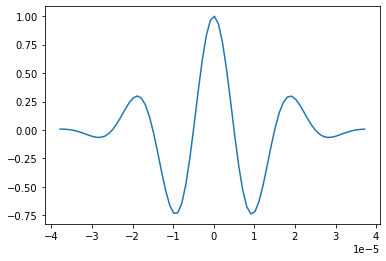

In [161]:
tc = signal.gausspulse('cutoff',fc=50e3,bw=0.6,bwr=-6,tpr=-40)
t = np.arange(-tc, tc, 1e-6)
yi = signal.gausspulse(t,50e3,0.6)
plt.plot(t,yi)